In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.svm import SVC,SVR

from sklearn.metrics import accuracy_score,f1_score,precision_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
from google.colab import files
uploaded = files.upload(r"C:\Users\Administrator\Downloads\city_day.csv\city_day.csv")

Saving air.csv to C:\Users\Administrator\Downloads\city_day.csv\city_day.csv/air.csv


In [ ]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\city_day.csv\city_day.csv/air.csv")

In [4]:
df.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN


In [5]:
df['AQI_Bucket']=df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

In [6]:
 df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
df.drop('Xylene',inplace=True,axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
# df['City'] = le.fit_transform(df['City'])
# df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'])

In [11]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,0,1/1/2015,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,1
1,0,1/2/2015,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,1
2,0,1/3/2015,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,1
3,0,1/4/2015,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,1
4,0,1/5/2015,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,0
29527,25,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,3
29528,25,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,3
29529,25,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,3


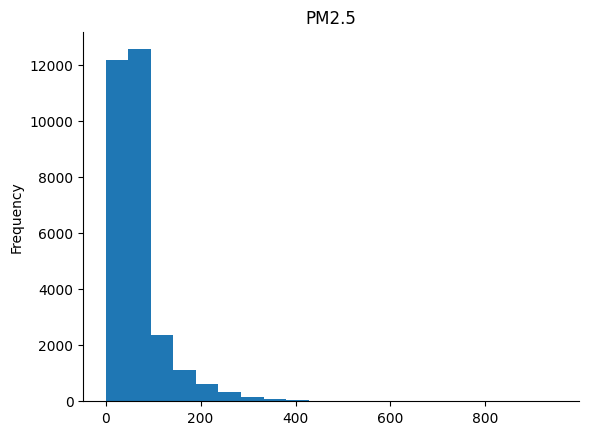

In [ ]:
from matplotlib import pyplot as plt
df['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.describe()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,12.888592,64.510857,109.659366,16.642601,27.726576,31.063568,20.813789,2.153872,13.830897,33.994121,2.859874,7.140485,158.781552,2.058210
std,7.587015,59.807551,72.324020,21.506064,23.050531,29.477748,21.028862,6.724660,17.005647,20.202304,14.252822,17.224737,130.272413,1.344527
min,0.000000,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000,0.000000
25%,6.000000,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,88.000000,1.000000
50%,14.000000,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,118.000000,1.000000
75%,20.000000,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,179.000000,3.000000
max,25.000000,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,2049.000000,5.000000


AQI Predictor : For predict AQI_bucket

In [12]:
class AQIPredictor:
    def __init__(self, model=None):
        self.model = model if model else RandomForestClassifier(n_estimators=10)
        self.city_encoder = LabelEncoder()
        self.bucket_encoder = LabelEncoder()
        self.scaler = StandardScaler()
        self.feature_columns = []
        self.fitted = False

    def fit(self, df):
        df = df.copy()

        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop(['Date', 'Xylene'], axis=1, errors='ignore', inplace=True)

        df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])
        df.fillna(df.median(numeric_only=True), inplace=True)

        df['City'] = self.city_encoder.fit_transform(df['City'])
        df['AQI_Bucket'] = self.bucket_encoder.fit_transform(df['AQI_Bucket'])

        X = df.drop('AQI_Bucket', axis=1)
        y = df['AQI_Bucket']
        self.feature_columns = X.columns.tolist()

        X_scaled = self.scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)
        self.fitted = True
        print("✅ Model trained. Accuracy:", round(self.model.score(X_test, y_test) * 100, 2), "%")





    def preprocess_sample(self, sample_dict):
        df = pd.DataFrame([sample_dict])
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop('Date', axis=1, inplace=True)

        df['City'] = self.city_encoder.transform(df['City'])
        df = df[self.feature_columns]
        return self.scaler.transform(df)

    def predict(self, sample_dict):
        if not self.fitted:
            raise Exception("Model not trained yet.")
        sample_processed = self.preprocess_sample(sample_dict)
        pred_encoded = self.model.predict(sample_processed)[0]
        return self.bucket_encoder.inverse_transform([pred_encoded])[0]

    def classification_report(self):
        if not self.fitted:
            raise Exception("Model not trained yet.")
        if self.X_test is None or self.y_test is None:
             raise Exception("Test data not available. Fit the model first.")

        predicted_bucket_encoded = self.model.predict(self.X_test).astype(int)

        # Filter out predicted labels that are not in the bucket encoder's known classes
        known_classes = list(range(len(self.bucket_encoder.classes_)))
        valid_indices = [i for i, p in enumerate(predicted_bucket_encoded) if p in known_classes]

        if len(valid_indices) < len(predicted_bucket_encoded):
             print(f"Warning: {len(predicted_bucket_encoded) - len(valid_indices)} predicted labels were outside the range of known classes.")
             # Decide how to handle this for the report. For now, proceed with valid indices.
             # A more robust solution might involve adding a 'unknown' class or investigating why the model predicts out of range.

        if not valid_indices:
             print("No valid predictions to generate classification report.")
             return

        y_test_decoded = self.bucket_encoder.inverse_transform(self.y_test[valid_indices])
        predicted_bucket_decoded = self.bucket_encoder.inverse_transform(predicted_bucket_encoded[valid_indices])

        try:
             print("\nClassification Report:\n", classification_report(y_test_decoded, predicted_bucket_decoded))
        except ValueError as e:
             print(f"Error generating classification report: Could not inverse transform labels. Ensure all labels in y_test and predictions are known by the bucket encoder. Error: {e}")
        except Exception as e:
             print(f"An unexpected error occurred during classification report generation: {e}")


In [13]:
predictor = AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)



✅ Model trained. Accuracy: 99.88 %

🔍 Enter values to predict AQI Bucket:
Enter City (e.g., Delhi): Delhi
Enter Date (YYYY-MM-DD): 2015-1-12
Enter PM2.5: 89.13
Enter PM10: NaN
Enter NO: 1
Enter NO2: 12
Enter NOx: 13
Enter NH3: 12
Enter CO: 12
Enter SO2: 12
Enter O3: 1
Enter Benzene: 12
Enter Toluene: 1
Enter AQI: 390


ValueError: invalid literal for int() with base 10: 'Delhi'

In [14]:
#For Knn Classifier
class KNNAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=KNeighborsClassifier())




In [ ]:
predictor = KNNAQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)

✅ Model trained. Accuracy: 80.75 %

🔍 Enter values to predict AQI Bucket:


In [ ]:
#for Decision Tree
class DecisionTreeAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=DecisionTreeClassifier())

In [ ]:
predictor = DecisionTreeAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)

In [ ]:
#for Logistic Regression
class LogisticAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=LogisticRegression())

In [ ]:
predictor = LogisticAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)


✅ Model trained. Accuracy: 99.88 %


In [ ]:
#for Svc
class SVCAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model = SVC())

In [ ]:
8
#FOR SVC
predictor = SVCAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}
predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)

✅ Model trained. Accuracy: 99.86 %

🔍 Enter values to predict AQI Bucket:
Enter City (e.g., Delhi): Delhi
Enter Date (YYYY-MM-DD): d
Enter PM2.5: 1
Enter PM10: q


ValueError: could not convert string to float: 'q'

In [ ]:
class BAGGINGAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=BaggingClassifier())

In [ ]:
predictor = BAGGINGAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)

print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

predicted_bucket = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)

In [ ]:
#Prediction for AQI

In [ ]:
df

In [ ]:
class AQIPredictor2:
    def __init__(self, model=None):
        self.model = model if model else RandomForestRegressor()
        self.city_encoder = LabelEncoder()
        self.bucket_encoder = LabelEncoder()
        self.scaler = StandardScaler()
        self.feature_columns = []
        self.fitted = False

    def fit(self, df):
        df = df.copy()

        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop(['Date', 'Xylene'], axis=1, errors='ignore', inplace=True)

        df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])
        df.fillna(df.median(numeric_only=True), inplace=True)

        df['City'] = self.city_encoder.fit_transform(df['City'])
        df['AQI_Bucket'] = self.bucket_encoder.fit_transform(df['AQI_Bucket'])

        X = df.drop('AQI', axis=1)
        y = df['AQI']
        self.feature_columns = X.columns.tolist()

        X_scaled = self.scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)
        self.fitted = True
        print("✅ Model trained. Accuracy:", round(self.model.score(X_test, y_test) * 100, 2), "%")






    def preprocess_sample(self, sample_dict):
        df = pd.DataFrame([sample_dict])
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop('Date', axis=1, inplace=True)

        df['City'] = self.city_encoder.transform(df['City'])
        df = df[self.feature_columns]
        return self.scaler.transform(df)

    def predict(self, sample_dict):
        if not self.fitted:
            raise Exception("Model not trained yet.")
        sample_processed = self.preprocess_sample(sample_dict)
        pred_encoded = self.model.predict(sample_processed)[0]
        return self.bucket_encoder.inverse_transform([pred_encoded])[0]




In [ ]:
predictor = AQIPredictor2()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': float(input("Enter AQI_Bucket: "))
}

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI Bucket:", predicted_AQI)

✅ Model trained. Accuracy: 95.34 %

🔍 Enter values to predict AQI:
Enter City (e.g., Delhi): delhi
Enter Date (YYYY-MM-DD): u
Enter PM2.5: 1d


ValueError: could not convert string to float: '1d'

In [ ]:
#for Svr
class SVRAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=SVR())

In [ ]:
predictor = SVRAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': float(input("Enter AQI_Bucket: "))
}

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

✅ Model trained. Accuracy: 63.24 %

🔍 Enter values to predict AQI:
Enter City (e.g., Delhi): de
Enter Date (YYYY-MM-DD): 1
Enter PM2.5: a


ValueError: could not convert string to float: 'a'

In [ ]:
# #for Svc
# class RandomForestRegressorAQIPredictor(AQIPredictor2):
#     def __init__(self):
#         super().__init__(model=RandomForestRegressor())

In [ ]:
#for Svc
class BaggingRegressorAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=BaggingRegressor())

In [ ]:
predictor = BaggingRegressorAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': float(input("Enter AQI_Bucket: "))
}

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)


In [ ]:
#for Svc
class LinearAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=LinearRegression())

In [ ]:
predictor = LinearAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': float(input("Enter AQI_Bucket: "))
}

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

In [ ]:
#for Svc
class DecisionTreeRegressorAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=DecisionTreeRegressor())

In [ ]:
predictor = DecisionTreeRegressorAQIPredictor2()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': float(input("Enter AQI_Bucket: "))
}

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

In [ ]:
#for Svc
class KNNRegressorAQIPredictor(AQIPredictor2):
    def __init__(self):
        super().__init__(model=KNeighborsRegressor())

In [ ]:
predictor = KNNRegressorAQIPredictor()  # Or DecisionTreeAQIPredictor(), AQIPredictor()
predictor.fit(df)
print("\n🔍 Enter values to predict AQI:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI_Bucket': float(input("Enter AQI_Bucket: "))
}

predicted_AQI = predictor.predict(sample_input)
print("\n🌫️ Predicted AQI:", predicted_AQI)

Plotting

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.lineplot(x='City',y='AQI',data=df)

plt.xticks(rotation=90,color='r')
plt.show()

In [ ]:
sns.boxplot(x='City',y='AQI',data=df)
plt.xticks(rotation=90,color='r')

plt.show()

In [ ]:
sns.violinplot(x='City',y='AQI',data=df)
plt.xticks(rotation=90,color='r')

plt.show()

In [ ]:
df

In [ ]:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop(['Date', 'Xylene'], axis=1, errors='ignore', inplace=True)

In [ ]:
df

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [ ]:
corr_matrix = df.corr()

In [ ]:
df

In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,mean_squared_error,mean_absolute_error, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import io # Added import for handling uploaded files in Colab

# Assume df is loaded here from a previous step (e.g., files.upload() in Colab or a local path)
# If running in Colab and using files.upload():
# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['city_day.csv']))

# If running locally:
try:
        df = pd.read_csv(r"C:\Users\Administrator\Downloads\city_day.csv\city_day.csv")
except FileNotFoundError:
    print("Ensure the file 'city_day.csv' exists at the specified path or use files.upload() in Colab.")
    # Exit or handle the error appropriately if the file is not found.
    # For demonstration, let's create a dummy DataFrame if the file is not found



df['AQI_Bucket']=df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])
df.fillna(df.median(numeric_only=True), inplace=True)
if 'Xylene' in df.columns:
    df.drop('Xylene',inplace=True,axis=1)

# Define the base class for AQI Bucket prediction (classification)
class AQIPredictor:
    def __init__(self, model=None):
        self.model = model if model else RandomForestClassifier(n_estimators=10)
        print(f"Using model for AQI Bucket prediction: {type(self.model).__name__}") # Added print statement
        self.city_encoder = LabelEncoder()
        self.bucket_encoder = LabelEncoder()
        self.scaler = StandardScaler()
        self.feature_columns = []
        self.fitted = False
        self.X_test = None
        self.y_test = None


    def fit(self, df):
        df = df.copy()

        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df.drop(['Date', 'Xylene'], axis=1, errors='ignore', inplace=True)

        df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])
        df.fillna(df.median(numeric_only=True), inplace=True)

        df['City'] = self.city_encoder.fit_transform(df['City'])
        df['AQI_Bucket'] = self.bucket_encoder.fit_transform(df['AQI_Bucket'])

        X = df.drop('AQI_Bucket', axis=1)
        y = df['AQI_Bucket']
        self.feature_columns = X.columns.tolist()

        X_scaled = self.scaler.fit_transform(X)

        X_train, self.X_test, y_train, self.y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)
        self.fitted = True
        print("✅ Model trained. Accuracy:", round(self.model.score(self.X_test, self.y_test) * 100, 2), "%")


    def preprocess_sample(self, sample_dict):
        sample_df = pd.DataFrame([sample_dict])
        sample_df['Date'] = pd.to_datetime(sample_df['Date'])
        sample_df['Year'] = sample_df['Date'].dt.year
        sample_df['Month'] = sample_df['Date'].dt.month
        sample_df['Day'] = sample_df['Date'].dt.day
        sample_df.drop('Date', axis=1, inplace=True)

        try:
            sample_df['City'] = self.city_encoder.transform(sample_df['City'])
        except ValueError as e:
             raise ValueError(f"City '{sample_df['City'].iloc[0]}' not seen during training.") from e

        sample_df = sample_df.reindex(columns=self.feature_columns, fill_value=0)

        return self.scaler.transform(sample_df)

    def predict(self, sample_dict):
        if not self.fitted:
            raise Exception("Model not trained yet.")
        sample_processed = self.preprocess_sample(sample_dict)
        pred_encoded = self.model.predict(sample_processed)[0]
        try:
            return self.bucket_encoder.inverse_transform([pred_encoded])[0]
        except ValueError as e:
            print(f"Warning: Predicted class label ({pred_encoded}) not seen during training. Error: {e}")
            # Find the closest known class or return a default
            # For simplicity, returning a string representation of the unknown label
            return f"Unknown Bucket (Code: {pred_encoded})"


    def classification_report(self):
        if not self.fitted:
            raise Exception("Model not trained yet.")
        if self.X_test is None or self.y_test is None:
             raise Exception("Test data not available. Fit the model first.")

        predicted_bucket_encoded = self.model.predict(self.X_test).astype(int)

        # Filter out predicted labels that are not in the bucket encoder's known classes
        known_classes = list(range(len(self.bucket_encoder.classes_)))
        valid_indices = [i for i, p in enumerate(predicted_bucket_encoded) if p in known_classes]

        if len(valid_indices) < len(predicted_bucket_encoded):
             print(f"Warning: {len(predicted_bucket_encoded) - len(valid_indices)} predicted labels were outside the range of known classes.")
             # Decide how to handle this for the report. For now, proceed with valid indices.
             # A more robust solution might involve adding a 'unknown' class or investigating why the model predicts out of range.

        if not valid_indices:
             print("No valid predictions to generate classification report.")
             return

        y_test_decoded = self.bucket_encoder.inverse_transform(self.y_test[valid_indices])
        predicted_bucket_decoded = self.bucket_encoder.inverse_transform(predicted_bucket_encoded[valid_indices])

        try:
             print("\nClassification Report:\n", classification_report(y_test_decoded, predicted_bucket_decoded))
        except ValueError as e:
             print(f"Error generating classification report: Could not inverse transform labels. Ensure all labels in y_test and predictions are known by the bucket encoder. Error: {e}")
        except Exception as e:
             print(f"An unexpected error occurred during classification report generation: {e}")


# Define other classification predictor classes inheriting from AQIPredictor
class KNNAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=KNeighborsClassifier())

class DecisionTreeAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=DecisionTreeClassifier())

class LogisticAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=LogisticRegression())

class SVCAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=SVC())

class BAGGINGAQIPredictor(AQIPredictor):
    def __init__(self):
        super().__init__(model=BaggingClassifier())


# Example usage of AQIPredictor (RandomForestClassifier by default)
# This will now print "Using model for AQI Bucket prediction: RandomForestClassifier"
predictor = AQIPredictor()
predictor.fit(df.copy())

print("\n🔍 Enter values to predict AQI Bucket:")
sample_input = {
    'City': input("Enter City (e.g., Delhi): "),
    'Date': input("Enter Date (YYYY-MM-DD): "),
    'PM2.5': float(input("Enter PM2.5: ")),
    'PM10': float(input("Enter PM10: ")),
    'NO': float(input("Enter NO: ")),
    'NO2': float(input("Enter NO2: ")),
    'NOx': float(input("Enter NOx: ")),
    'NH3': float(input("Enter NH3: ")),
    'CO': float(input("Enter CO: ")),
    'SO2': float(input("Enter SO2: ")),
    'O3': float(input("Enter O3: ")),
    'Benzene': float(input("Enter Benzene: ")),
    'Toluene': float(input("Enter Toluene: ")),
    'AQI': float(input("Enter AQI: "))
}

sample_input_template = {col: 0.0 for col in predictor.feature_columns}
for key in sample_input:
    if key in sample_input_template:
        sample_input_template[key] = sample_input[key]

try:
    predicted_bucket = predictor.predict(sample_input_template)
    print("\n🌫️ Predicted AQI Bucket:", predicted_bucket)
    predictor.classification_report()
except ValueError as e:
    print(f"Prediction Error: {e}")

# The rest of the code for other classifiers and regressors follows similarly
# Make sure to use the correct base class (AQIPredictor for classification, AQIRegressor for regression)
# and update print statements and evaluation methods (classification_report for classification, evaluate for regression)

IsADirectoryError: [Errno 21] Is a directory: 'C:\\Users\\Administrator\\Downloads\\city_day.csv\\city_day.csv'